# Predicting Polish demography (total population, year by year), using fertility rate, imigration data and historic population change.
First off, required imports:


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import re
import json


# Data to process
First of all, population over the years.
We will take this from World Development Indicators, as they have very recent data, just from 2024-03-28.



In [15]:


# Read the CSV file into a DataFrame
df = pd.read_csv('Countries_population.csv')

# Filter the DataFrame to include only the rows where the country is "Poland"
polish_population_df = df[df['Country Name'] == 'Poland']
polish_population_df = polish_population_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_population_df.dropna(axis='columns',inplace=True)
polish_population_df=polish_population_df.rename(index={0: 'Year', 1: 'Population'})
# Display the resulting DataFrame
polish_population_df


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

Lets graph those values:

<Axes: >

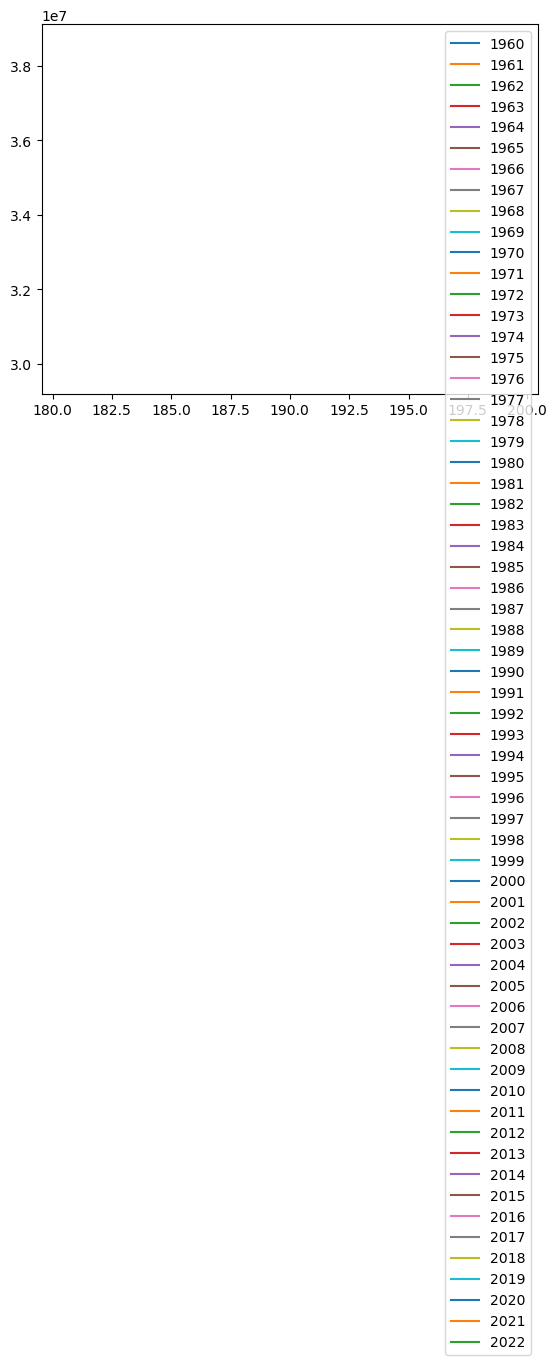